# 讀取資料

In [1]:
import nba_api
#BOSTON  id
id=1610612738
import pandas as pd
#調用函數“ League Game Finder”在nba 套件中進行API stats.endpoints 
from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id)
games = gamefinder.get_data_frames()[0] # [0] 抓取到的資料從list 改為 dataframe
print(games.shape)
games

(3495, 28)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42019,1610612738,BOS,Boston Celtics,0041900306,2020-09-27,BOS @ MIA,L,240,113,...,0.800,13,29,42,26,7,2,10,21,-12.0
1,42019,1610612738,BOS,Boston Celtics,0041900305,2020-09-25,BOS vs. MIA,W,238,121,...,0.862,13,37,50,29,7,4,11,23,13.0
2,42019,1610612738,BOS,Boston Celtics,0041900304,2020-09-23,BOS @ MIA,L,239,109,...,0.810,12,34,46,28,3,5,19,24,0.2
3,42019,1610612738,BOS,Boston Celtics,0041900303,2020-09-19,BOS @ MIA,W,240,117,...,0.867,10,40,50,27,8,3,14,29,8.4
4,42019,1610612738,BOS,Boston Celtics,0041900302,2020-09-17,BOS vs. MIA,L,240,101,...,0.792,6,35,41,19,5,3,20,22,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3490,21983,1610612738,BOS,Boston Celtics,0028300052,1983-11-05,BOS @ WAS,W,240,120,...,0.778,5,28,33,36,7,7,16,26,NaN
3491,21983,1610612738,BOS,Boston Celtics,0028300043,1983-11-04,BOS vs. IND,W,240,121,...,0.841,11,34,45,28,8,5,22,26,NaN
3492,21983,1610612738,BOS,Boston Celtics,0028300033,1983-11-02,BOS vs. MIL,W,240,119,...,0.816,14,24,38,26,7,7,18,18,NaN
3493,21983,1610612738,BOS,Boston Celtics,0028300019,1983-10-29,BOS @ CLE,W,240,108,...,0.690,13,31,44,25,12,7,13,22,NaN


In [2]:
#例行賽為每年7月開始, 季後賽取16隊每年4月開始 總決賽為每年6月
print(games[['SEASON_ID']].groupby(by="SEASON_ID").size())

SEASON_ID
12003     1
12004     3
12005     8
12006     8
12007     7
         ..
42015     6
42016    18
42017    19
42018     9
42019    17
Length: 81, dtype: int64


In [3]:
games.dtypes

SEASON_ID             object
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_NAME             object
GAME_ID               object
GAME_DATE             object
MATCHUP               object
WL                    object
MIN                    int64
PTS                    int64
FGM                    int64
FGA                    int64
FG_PCT               float64
FG3M                   int64
FG3A                   int64
FG3_PCT              float64
FTM                    int64
FTA                    int64
FT_PCT               float64
OREB                   int64
DREB                   int64
REB                    int64
AST                    int64
STL                    int64
BLK                    int64
TOV                    int64
PF                     int64
PLUS_MINUS           float64
dtype: object

In [4]:
#去掉遺失值
games = games[games.loc[:,'PTS'] != 0]
games = games.dropna()

# 定義一個新的欄位 year (是哪一年的比賽嗎?)
games['year'] = games.SEASON_ID.str[1:5].astype(int)

# 定義一個新的欄位 Home (是主場嗎?)
games['Home'] = games.MATCHUP.str.len()>10

# 定義一個新的欄位 Player (對手是?)
games['Player'] = games.MATCHUP.str.rsplit(' ').str[-1]

#轉換日期 Object to date , 圖上的日期就會由舊往新排列
#games['GAME_DATE'] = pd.to_datetime(games['GAME_DATE'])

games.to_csv("Bos.csv")
games

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,year,Home,Player
0,42019,1610612738,BOS,Boston Celtics,0041900306,2020-09-27,BOS @ MIA,L,240,113,...,42,26,7,2,10,21,-12.0,2019,False,MIA
1,42019,1610612738,BOS,Boston Celtics,0041900305,2020-09-25,BOS vs. MIA,W,238,121,...,50,29,7,4,11,23,13.0,2019,True,MIA
2,42019,1610612738,BOS,Boston Celtics,0041900304,2020-09-23,BOS @ MIA,L,239,109,...,46,28,3,5,19,24,0.2,2019,False,MIA
3,42019,1610612738,BOS,Boston Celtics,0041900303,2020-09-19,BOS @ MIA,W,240,117,...,50,27,8,3,14,29,8.4,2019,False,MIA
4,42019,1610612738,BOS,Boston Celtics,0041900302,2020-09-17,BOS vs. MIA,L,240,101,...,41,19,5,3,20,22,-5.0,2019,True,MIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,21996,1610612738,BOS,Boston Celtics,0029600066,1996-11-09,BOS @ CHI,L,238,92,...,46,14,9,2,26,24,-14.0,1996,False,CHI
2286,21996,1610612738,BOS,Boston Celtics,0029600053,1996-11-08,BOS vs. PHI,L,240,105,...,44,22,10,5,20,34,-10.0,1996,True,PHI
2287,21996,1610612738,BOS,Boston Celtics,0029600041,1996-11-06,BOS vs. IND,W,240,94,...,33,24,11,6,15,19,10.0,1996,True,IND
2288,21996,1610612738,BOS,Boston Celtics,0029600020,1996-11-02,BOS @ MIL,L,241,102,...,41,16,7,4,17,30,-22.0,1996,False,MIL


In [5]:
train = games[games['SEASON_ID']!='42019']
test = games[games['SEASON_ID']=='42019']
train.to_csv('train.csv') # for資料探索
test.to_csv('test.csv') # 季後賽得分預測
train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,year,Home,Player
17,22019,1610612738,BOS,Boston Celtics,0021901308,2020-08-13,BOS vs. WAS,L,240,90,...,51,22,8,7,18,19,-6.0,2019,True,WAS
18,22019,1610612738,BOS,Boston Celtics,0021901301,2020-08-11,BOS @ MEM,W,242,122,...,46,29,7,7,12,27,15.0,2019,False,MEM
19,22019,1610612738,BOS,Boston Celtics,0021901288,2020-08-09,BOS vs. ORL,W,266,122,...,54,32,9,7,12,19,3.0,2019,True,ORL
20,22019,1610612738,BOS,Boston Celtics,0021901279,2020-08-07,BOS @ TOR,W,240,122,...,52,27,8,2,14,22,22.0,2019,False,TOR
21,22019,1610612738,BOS,Boston Celtics,0021901267,2020-08-05,BOS vs. BKN,W,242,149,...,43,29,10,10,14,23,34.0,2019,True,BKN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,21996,1610612738,BOS,Boston Celtics,0029600066,1996-11-09,BOS @ CHI,L,238,92,...,46,14,9,2,26,24,-14.0,1996,False,CHI
2286,21996,1610612738,BOS,Boston Celtics,0029600053,1996-11-08,BOS vs. PHI,L,240,105,...,44,22,10,5,20,34,-10.0,1996,True,PHI
2287,21996,1610612738,BOS,Boston Celtics,0029600041,1996-11-06,BOS vs. IND,W,240,94,...,33,24,11,6,15,19,10.0,1996,True,IND
2288,21996,1610612738,BOS,Boston Celtics,0029600020,1996-11-02,BOS @ MIL,L,241,102,...,41,16,7,4,17,30,-22.0,1996,False,MIL


# Data rolling

In [6]:
#加 MA_5(前五場平均得分)  and 前一筆得分(or FGM/FG3M/FTM)"FGA", "FG3A", "FTM", "FTA", "REB", "STL","BLK","TOV","PF"
import numpy as np
p=3
train = train.sort_values(by=['GAME_DATE']) #依時間排序
train["MA_3_PTS"] = np.round(train["PTS"].rolling(window =p,
                  center = False  ).mean(),2) #往前三筆含自己做平均
train["MA_3_FG_PCT"] = np.round(train["FG_PCT"].rolling(window =p, center = 
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_FGM"] = np.round(train["FGM"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_3_FGA"] = np.round(train["FGA"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_3_FG3M"] = np.round(train["FG3M"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_3_FG3A"] = np.round(train["FG3A"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_3_FTM"] = np.round(train["FTM"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_3_AST"] = np.round(train["AST"].rolling(window =p, center = 
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_PLUS_MINUS"] = np.round(train["PLUS_MINUS"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_REB"] = np.round(train["REB"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_STL"] = np.round(train["STL"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_BLK"] = np.round(train["BLK"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_TOV"] = np.round(train["TOV"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_PF"] = np.round(train["PF"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己

train["Last_PTS"] = train.PTS.shift() #往前一筆
train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_3_FG3A,MA_3_FTM,MA_3_AST,MA_3_PLUS_MINUS,MA_3_REB,MA_3_STL,MA_3_BLK,MA_3_TOV,MA_3_PF,Last_PTS
2289,21996,1610612738,BOS,Boston Celtics,0029600001,1996-11-01,BOS vs. CHI,L,240,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2288,21996,1610612738,BOS,Boston Celtics,0029600020,1996-11-02,BOS @ MIL,L,241,102,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0
2287,21996,1610612738,BOS,Boston Celtics,0029600041,1996-11-06,BOS vs. IND,W,240,94,...,14.67,20.67,20.00,-7.00,36.67,9.33,4.00,16.67,27.33,102.0
2286,21996,1610612738,BOS,Boston Celtics,0029600053,1996-11-08,BOS vs. PHI,L,240,105,...,14.33,21.33,20.67,-7.33,39.33,9.33,5.00,17.33,27.67,94.0
2285,21996,1610612738,BOS,Boston Celtics,0029600066,1996-11-09,BOS @ CHI,L,238,92,...,16.00,16.00,20.00,-4.67,41.00,10.00,4.33,20.33,25.67,105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,22019,1610612738,BOS,Boston Celtics,0021901267,2020-08-05,BOS vs. BKN,W,242,149,...,34.00,25.67,22.67,10.67,41.33,8.67,6.67,14.67,23.33,106.0
20,22019,1610612738,BOS,Boston Celtics,0021901279,2020-08-07,BOS @ TOR,W,240,122,...,39.33,21.00,23.67,16.67,46.67,8.33,5.33,14.67,23.67,149.0
19,22019,1610612738,BOS,Boston Celtics,0021901288,2020-08-09,BOS vs. ORL,W,266,122,...,41.67,20.33,29.33,19.67,49.67,9.00,6.33,13.33,21.33,122.0
18,22019,1610612738,BOS,Boston Celtics,0021901301,2020-08-11,BOS @ MEM,W,242,122,...,41.00,16.67,29.33,13.33,50.67,8.00,5.33,12.67,22.67,122.0


In [7]:
#依照對戰球隊和日期做排序(此加了 MA_5 and 前一筆得分(or FGM/FG3M/FTM))
import numpy as np

train = train.sort_values(by=['Player','GAME_DATE'])
train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_3_FG3A,MA_3_FTM,MA_3_AST,MA_3_PLUS_MINUS,MA_3_REB,MA_3_STL,MA_3_BLK,MA_3_TOV,MA_3_PF,Last_PTS
2284,21996,1610612738,BOS,Boston Celtics,0029600089,1996-11-13,BOS vs. ATL,W,240,103,...,19.00,16.33,21.00,-2.00,44.67,10.33,3.67,22.67,26.33,92.0
2275,21996,1610612738,BOS,Boston Celtics,0029600226,1996-12-03,BOS @ ATL,L,239,95,...,13.00,12.67,16.33,-12.33,38.00,9.00,3.00,12.33,20.00,77.0
2251,21996,1610612738,BOS,Boston Celtics,0029600592,1997-01-25,BOS @ ATL,L,238,90,...,17.67,18.67,22.33,-4.00,41.67,14.00,5.00,14.67,25.33,117.0
2228,21996,1610612738,BOS,Boston Celtics,0029600876,1997-03-09,BOS vs. ATL,L,241,90,...,20.00,22.00,22.33,-12.00,40.33,6.67,3.33,16.67,22.00,102.0
2168,21997,1610612738,BOS,Boston Celtics,0029700581,1998-01-23,BOS @ ATL,W,241,89,...,17.00,13.00,19.67,-7.00,33.33,10.67,3.67,15.33,29.67,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,22018,1610612738,BOS,Boston Celtics,0021800931,2019-03-01,BOS vs. WAS,W,238,107,...,31.00,14.33,23.33,-5.67,44.67,7.67,3.67,14.00,19.33,92.0
111,22018,1610612738,BOS,Boston Celtics,0021801211,2019-04-09,BOS @ WAS,W,239,116,...,34.00,12.33,27.33,6.00,46.00,8.67,4.33,9.67,17.00,108.0
82,22019,1610612738,BOS,Boston Celtics,0021900156,2019-11-13,BOS vs. WAS,W,240,140,...,36.00,23.33,28.33,12.33,44.33,6.67,7.00,9.33,26.00,116.0
58,22019,1610612738,BOS,Boston Celtics,0021900542,2020-01-06,BOS @ WAS,L,240,94,...,27.00,19.33,20.67,1.67,51.00,8.67,6.67,15.67,19.33,111.0


In [8]:
train.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'year', 'Home',
       'Player', 'MA_3_PTS', 'MA_3_FG_PCT', 'MA_3_FGM', 'MA_3_FGA',
       'MA_3_FG3M', 'MA_3_FG3A', 'MA_3_FTM', 'MA_3_AST', 'MA_3_PLUS_MINUS',
       'MA_3_REB', 'MA_3_STL', 'MA_3_BLK', 'MA_3_TOV', 'MA_3_PF', 'Last_PTS'],
      dtype='object')

In [9]:
#MA_5_by_player為對戰此對手前五場的平均分數  Last_PTS_player為對戰此對手的上場分數
#'MA_5_PTS', 'MA_5_FG_PCT', 'MA_5_FGM', 'MA_5_FGA','MA_5_FG3M', 'MA_5_FG3A', 'MA_5_FTM', 'MA_5_AST', 'MA_5_PLUS_MINUS',
#'MA_5_REB', 'MA_5_STL', 'MA_5_BLK', 'MA_5_TOV', 'MA_5_PF'
train["MA_3_PTS_by_player"] = np.round(train["PTS"].rolling(window =p, 
                            center =False  ).mean(),2) #往前三筆含自己
train["MA_3_FG_PCT_by_player"] = np.round(train["FG_PCT"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己
train["MA_3_FGM_by_player"] = np.round(train["FGM"].rolling(window =p, center = False  ).mean(),2)
train["MA_3_FGA_by_player"] = np.round(train["FGA"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_3_FG3M_by_player"] = np.round(train["FG3M"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_3_FG3A_by_player"] = np.round(train["FG3A"].rolling(window =p, center =
                       False  ).mean(),2)
train["MA_3_FTM_by_player"] = np.round(train["FTM"].rolling(window =p, center =
                       False  ).mean(),2)

train["MA_3_AST_by_player"] = np.round(train["AST"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己
train["MA_3_PLUS_MINUS_by_player"] = np.round(train["PLUS_MINUS"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己

train["MA_3_REB_by_player"] = np.round(train["REB"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_STL_by_player"] = np.round(train["STL"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_BLK_by_player"] = np.round(train["BLK"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_TOV_by_player"] = np.round(train["TOV"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
train["MA_3_PF_by_player"] = np.round(train["PF"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己

train["Last_PTS_player"] = train.PTS.shift() #往前一筆
train

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_3_FG3A_by_player,MA_3_FTM_by_player,MA_3_AST_by_player,MA_3_PLUS_MINUS_by_player,MA_3_REB_by_player,MA_3_STL_by_player,MA_3_BLK_by_player,MA_3_TOV_by_player,MA_3_PF_by_player,Last_PTS_player
2284,21996,1610612738,BOS,Boston Celtics,0029600089,1996-11-13,BOS vs. ATL,W,240,103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2275,21996,1610612738,BOS,Boston Celtics,0029600226,1996-12-03,BOS @ ATL,L,239,95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0
2251,21996,1610612738,BOS,Boston Celtics,0029600592,1997-01-25,BOS @ ATL,L,238,90,...,17.00,14.00,20.00,1.00,37.67,10.33,3.33,18.00,19.67,95.0
2228,21996,1610612738,BOS,Boston Celtics,0029600876,1997-03-09,BOS vs. ATL,L,241,90,...,16.33,16.00,18.33,-13.00,37.00,9.67,3.00,19.33,20.67,90.0
2168,21997,1610612738,BOS,Boston Celtics,0029700581,1998-01-23,BOS @ ATL,W,241,89,...,16.33,16.00,19.00,-8.33,35.00,11.33,2.67,18.00,23.33,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,22018,1610612738,BOS,Boston Celtics,0021800931,2019-03-01,BOS vs. WAS,W,238,107,...,35.33,20.00,22.67,1.33,46.67,10.67,2.00,13.67,18.33,130.0
111,22018,1610612738,BOS,Boston Celtics,0021801211,2019-04-09,BOS @ WAS,W,239,116,...,39.00,16.33,24.33,7.33,48.67,9.33,2.67,10.00,18.00,107.0
82,22019,1610612738,BOS,Boston Celtics,0021900156,2019-11-13,BOS vs. WAS,W,240,140,...,38.33,16.67,28.33,8.00,46.67,9.00,3.67,9.33,20.33,116.0
58,22019,1610612738,BOS,Boston Celtics,0021900542,2020-01-06,BOS @ WAS,L,240,94,...,39.00,19.00,25.33,2.67,49.67,7.33,5.33,10.67,21.00,140.0


In [10]:
train = train.sort_values(by=['GAME_DATE'],ascending=False)


In [11]:
train.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'year', 'Home',
       'Player', 'MA_3_PTS', 'MA_3_FG_PCT', 'MA_3_FGM', 'MA_3_FGA',
       'MA_3_FG3M', 'MA_3_FG3A', 'MA_3_FTM', 'MA_3_AST', 'MA_3_PLUS_MINUS',
       'MA_3_REB', 'MA_3_STL', 'MA_3_BLK', 'MA_3_TOV', 'MA_3_PF', 'Last_PTS',
       'MA_3_PTS_by_player', 'MA_3_FG_PCT_by_player', 'MA_3_FGM_by_player',
       'MA_3_FGA_by_player', 'MA_3_FG3M_by_player', 'MA_3_FG3A_by_player',
       'MA_3_FTM_by_player', 'MA_3_AST_by_player', 'MA_3_PLUS_MINUS_by_player',
       'MA_3_REB_by_player', 'MA_3_STL_by_player', 'MA_3_BLK_by_player',
       'MA_3_TOV_by_player', 'MA_3_PF_by_player', 'Last_PTS_player'],
      dtype='object')

In [12]:
train[['PTS', 'MA_3_PTS', 'MA_3_FG_PCT', 'MA_3_FGM', 'MA_3_FGA',
       'MA_3_FG3M', 'MA_3_FG3A', 'MA_3_FTM', 'MA_3_AST', 'MA_3_PLUS_MINUS',
       'MA_3_REB', 'MA_3_STL', 'MA_3_BLK', 'MA_3_TOV', 'MA_3_PF', 'Last_PTS',
       'MA_3_PTS_by_player', 'MA_3_FG_PCT_by_player', 'MA_3_FGM_by_player',
       'MA_3_FGA_by_player', 'MA_3_FG3M_by_player', 'MA_3_FG3A_by_player',
       'MA_3_FTM_by_player', 'MA_3_AST_by_player', 'MA_3_PLUS_MINUS_by_player',
       'MA_3_REB_by_player', 'MA_3_STL_by_player', 'MA_3_BLK_by_player',
       'MA_3_TOV_by_player', 'MA_3_PF_by_player', 'Last_PTS_player' ]].corr()

,PTS,MA_3_PTS,MA_3_FG_PCT,MA_3_FGM,MA_3_FGA,MA_3_FG3M,MA_3_FG3A,MA_3_FTM,MA_3_AST,MA_3_PLUS_MINUS,...,MA_3_FG3A_by_player,MA_3_FTM_by_player,MA_3_AST_by_player,MA_3_PLUS_MINUS_by_player,MA_3_REB_by_player,MA_3_STL_by_player,MA_3_BLK_by_player,MA_3_TOV_by_player,MA_3_PF_by_player,Last_PTS_player
PTS,1.000000,0.707997,0.382646,0.607400,0.380583,0.417319,0.322824,0.149937,0.461525,0.334793,...,0.336974,0.149362,0.447475,0.330484,0.242954,0.092276,0.068365,-0.058603,0.007776,0.217708
MA_3_PTS,0.707997,1.000000,0.545686,0.862747,0.537631,0.593432,0.454999,0.199794,0.654366,0.447176,...,0.432147,0.053170,0.372826,0.215132,0.233734,0.030887,0.051009,-0.103590,-0.057448,0.272860
MA_3_FG_PCT,0.382646,0.545686,1.000000,0.648335,-0.194376,0.112051,-0.133662,-0.064761,0.543753,0.508142,...,-0.093925,0.020724,0.258973,0.278418,-0.084106,-0.071391,0.094512,0.052236,-0.013011,0.081488
MA_3_FGM,0.607400,0.862747,0.648335,1.000000,0.614099,0.408288,0.280931,-0.227487,0.743643,0.402564,...,0.284649,-0.131198,0.393899,0.191452,0.199184,0.051887,0.058794,-0.100730,-0.075044,0.215155
MA_3_FGA,0.380583,0.537631,-0.194376,0.614099,1.000000,0.393561,0.486122,-0.228275,0.394750,-0.014292,...,0.450314,-0.186105,0.235206,-0.044897,0.341611,0.142577,-0.022485,-0.182718,-0.079106,0.187665
MA_3_FG3M,0.417319,0.593432,0.112051,0.408288,0.393561,1.000000,0.890369,-0.169549,0.362772,0.295109,...,0.757541,-0.155243,0.247351,0.154371,0.228548,-0.069859,0.010932,-0.225863,-0.255757,0.224108
MA_3_FG3A,0.322824,0.454999,-0.133662,0.280931,0.486122,0.890369,1.000000,-0.161986,0.243957,0.146377,...,0.851751,-0.175574,0.214860,0.085078,0.282375,-0.062783,-0.016398,-0.265047,-0.280674,0.234238
MA_3_FTM,0.149937,0.199794,-0.064761,-0.227487,-0.228275,-0.169549,-0.161986,1.000000,-0.184317,0.035952,...,-0.121842,0.480025,-0.079881,0.012115,-0.015576,0.024692,-0.003053,0.122862,0.200966,0.046111
MA_3_AST,0.461525,0.654366,0.543753,0.743643,0.394750,0.362772,0.243957,-0.184317,1.000000,0.381266,...,0.206431,-0.088808,0.496120,0.174676,0.088344,0.019084,0.019742,-0.088438,-0.070994,0.131972
MA_3_PLUS_MINUS,0.334793,0.447176,0.508142,0.402564,-0.014292,0.295109,0.146377,0.035952,0.381266,1.000000,...,0.123025,0.033474,0.195941,0.467442,0.162298,0.022595,0.093194,-0.092204,-0.096770,0.086119


In [13]:
#檢查遺失值
train.isnull().sum(),train.shape

(SEASON_ID             0
 TEAM_ID               0
 TEAM_ABBREVIATION     0
 TEAM_NAME             0
 GAME_ID               0
                      ..
 MA_3_STL_by_player    2
 MA_3_BLK_by_player    2
 MA_3_TOV_by_player    2
 MA_3_PF_by_player     2
 Last_PTS_player       1
 Length: 61, dtype: int64,
 (2246, 61))

In [14]:
#因為有四個變數有遺漏值，故需再補上
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')
# 依照策略strategy採用mean 或 median填補資料
train.iloc[:,31:63] = imr.fit_transform(train.iloc[:,31:63])
# 確認
train[-15:]


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_3_FG3A_by_player,MA_3_FTM_by_player,MA_3_AST_by_player,MA_3_PLUS_MINUS_by_player,MA_3_REB_by_player,MA_3_STL_by_player,MA_3_BLK_by_player,MA_3_TOV_by_player,MA_3_PF_by_player,Last_PTS_player
2275,21996,1610612738,BOS,Boston Celtics,0029600226,1996-12-03,BOS @ ATL,L,239,95,...,19.33,18.00,22.00,1.33,41.33,8.33,4.33,14.33,22.33,103.0
2276,21996,1610612738,BOS,Boston Celtics,0029600212,1996-11-30,BOS @ MIA,L,240,77,...,26.00,14.67,25.33,12.67,44.33,9.00,6.33,9.67,20.33,122.0
2277,21996,1610612738,BOS,Boston Celtics,0029600199,1996-11-29,BOS vs. HOU,L,241,94,...,27.00,16.67,23.00,-2.00,43.67,11.33,3.67,15.00,23.00,119.0
2278,21996,1610612738,BOS,Boston Celtics,0029600187,1996-11-27,BOS vs. LAL,W,240,110,...,32.33,21.33,24.33,7.00,50.67,9.33,3.33,15.00,24.33,141.0
2279,21996,1610612738,BOS,Boston Celtics,0029600169,1996-11-24,BOS vs. DAL,W,241,105,...,27.33,20.33,22.67,10.67,42.00,7.00,7.67,14.33,22.67,112.0
2280,21996,1610612738,BOS,Boston Celtics,0029600155,1996-11-22,BOS vs. SEA,L,240,91,...,33.67,26.33,24.33,-7.33,42.67,8.00,5.67,14.33,22.67,114.0
2281,21996,1610612738,BOS,Boston Celtics,0029600138,1996-11-20,BOS vs. DET,L,241,83,...,24.33,15.33,21.33,-5.33,39.33,8.67,4.33,15.67,21.00,108.0
2282,21996,1610612738,BOS,Boston Celtics,0029600116,1996-11-16,BOS @ WAS,L,242,92,...,15.67,17.33,20.33,-8.67,35.67,10.00,4.67,14.67,23.00,98.0
2283,21996,1610612738,BOS,Boston Celtics,0029600104,1996-11-15,BOS vs. DEN,L,239,80,...,29.67,21.67,18.33,4.67,47.00,4.33,7.00,14.00,23.67,109.0
2284,21996,1610612738,BOS,Boston Celtics,0029600089,1996-11-13,BOS vs. ATL,W,240,103,...,19.33,18.00,22.00,1.33,41.33,8.33,4.33,14.33,22.33,99.0


In [15]:
#檢查遺失值
train.isnull().sum(),train.shape

(SEASON_ID             0
 TEAM_ID               0
 TEAM_ABBREVIATION     0
 TEAM_NAME             0
 GAME_ID               0
                      ..
 MA_3_STL_by_player    0
 MA_3_BLK_by_player    0
 MA_3_TOV_by_player    0
 MA_3_PF_by_player     0
 Last_PTS_player       0
 Length: 61, dtype: int64,
 (2246, 61))

In [16]:
#主客場欄位改成0,1
train['Home'] = train['Home'].astype(int)
train['Home']

17      1
18      0
19      1
20      0
21      1
       ..
2285    0
2286    1
2287    1
2288    0
2289    1
Name: Home, Length: 2246, dtype: int32

# RFE 篩選


In [17]:
# add SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
y = train['PTS']
# 放入可能的特徵欄位...應該可以多放一些, 除了FGM/FGM3/FTM
cols = ['MA_3_PTS', 'MA_3_FG_PCT', 'MA_3_FGM', 'MA_3_FGA',
       'MA_3_FG3M', 'MA_3_FG3A', 'MA_3_FTM', 'MA_3_AST', 'MA_3_PLUS_MINUS',
       'MA_3_REB', 'MA_3_STL', 'MA_3_BLK', 'MA_3_TOV', 'MA_3_PF', 'Last_PTS',
       'MA_3_PTS_by_player', 'MA_3_FG_PCT_by_player', 'MA_3_FGM_by_player',
       'MA_3_FGA_by_player', 'MA_3_FG3M_by_player', 'MA_3_FG3A_by_player',
       'MA_3_FTM_by_player', 'MA_3_AST_by_player', 'MA_3_PLUS_MINUS_by_player',
       'MA_3_REB_by_player', 'MA_3_STL_by_player', 'MA_3_BLK_by_player',
       'MA_3_TOV_by_player', 'MA_3_PF_by_player', 'Last_PTS_player']
X = train[cols]


In [18]:
import sklearn
from sklearn.feature_selection import RFE
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X, y)

rfe = RFE(lm,
    n_features_to_select = n_features_optimal, step=2)             
rfe = rfe.fit(X, y)
print(rfe)


RFE(estimator=LinearRegression(), n_features_to_select=10, step=2)


In [19]:
rfe.support_

array([ True,  True,  True, False,  True, False,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False])

In [20]:
rfe.ranking_  ,cols

(array([ 1,  1,  1,  5,  1, 11,  1,  7,  6, 10,  9, 10,  3,  6,  2,  1,  1,
         1,  8,  1,  3,  1,  4,  8,  9, 11,  5,  4,  7,  2]),
 ['MA_3_PTS',
  'MA_3_FG_PCT',
  'MA_3_FGM',
  'MA_3_FGA',
  'MA_3_FG3M',
  'MA_3_FG3A',
  'MA_3_FTM',
  'MA_3_AST',
  'MA_3_PLUS_MINUS',
  'MA_3_REB',
  'MA_3_STL',
  'MA_3_BLK',
  'MA_3_TOV',
  'MA_3_PF',
  'Last_PTS',
  'MA_3_PTS_by_player',
  'MA_3_FG_PCT_by_player',
  'MA_3_FGM_by_player',
  'MA_3_FGA_by_player',
  'MA_3_FG3M_by_player',
  'MA_3_FG3A_by_player',
  'MA_3_FTM_by_player',
  'MA_3_AST_by_player',
  'MA_3_PLUS_MINUS_by_player',
  'MA_3_REB_by_player',
  'MA_3_STL_by_player',
  'MA_3_BLK_by_player',
  'MA_3_TOV_by_player',
  'MA_3_PF_by_player',
  'Last_PTS_player'])

In [21]:
cols =np.array(cols)
cols
cols[rfe.support_]



array(['MA_3_PTS', 'MA_3_FG_PCT', 'MA_3_FGM', 'MA_3_FG3M', 'MA_3_FTM',
       'MA_3_PTS_by_player', 'MA_3_FG_PCT_by_player',
       'MA_3_FGM_by_player', 'MA_3_FG3M_by_player', 'MA_3_FTM_by_player'],
      dtype='<U25')

In [22]:
a = pd.DataFrame(rfe.ranking_ ,cols,columns=['rank'])
a

#'MA_3_PTS', 'MA_3_FG_PCT', 'MA_3_FGM', 'MA_3_FG3M', 'MA_3_FTM','MA_3_PTS_by_player', 'MA_3_FG_PCT_by_player','MA_3_FGM_by_player', 'MA_3_FG3M_by_player', 'MA_3_FTM_by_player'

,rank
MA_3_PTS,1
MA_3_FG_PCT,1
MA_3_FGM,1
MA_3_FGA,5
MA_3_FG3M,1
MA_3_FG3A,11
MA_3_FTM,1
MA_3_AST,7
MA_3_PLUS_MINUS,6
MA_3_REB,10


# 特徵工程 分類變數轉連續變數 獨熱編碼 標籤編碼 有序編碼¶

In [23]:
train["Player"].unique()

array(['WAS', 'MEM', 'ORL', 'TOR', 'BKN', 'MIA', 'POR', 'MIL', 'HOU',
       'PHX', 'OKC', 'IND', 'UTA', 'CLE', 'LAL', 'MIN', 'LAC', 'ATL',
       'PHI', 'GSW', 'NOP', 'DET', 'CHI', 'SAS', 'CHA', 'DAL', 'DEN',
       'NYK', 'SAC', 'RMD', 'MLN', 'NOH', 'EAM', 'FBU', 'NJN', 'SEA',
       'NOK', 'CHH', 'VAN'], dtype=object)

In [24]:
Player_mapping ={'WAS':1, 'MEM':2, 'ORL':3, 'TOR':4, 'BKN':5, 'MIA':6, 'POR':7, 'MIL':8, 'HOU':9,
       'PHX':10, 'OKC':11, 'IND':12, 'UTA':13, 'CLE':14, 'LAL':15, 'MIN':16, 'LAC':17, 'ATL':18,
       'PHI':19, 'GSW':20, 'NOP':21, 'DET':22, 'CHI':23, 'SAS':24, 'CHA':25, 'DAL':26, 'DEN':27,
       'NYK':28, 'SAC':29, 'RMD':30, 'MLN':31, 'NOH':32, 'EAM':33, 'FBU':34, 'NJN':35, 'SEA':36,
       'NOK':37, 'CHH':38, 'VAN':39}
# 將'Player" 轉換成有序編碼
train ['Player'] = train ['Player'].map(Player_mapping)
train


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_3_FG3A_by_player,MA_3_FTM_by_player,MA_3_AST_by_player,MA_3_PLUS_MINUS_by_player,MA_3_REB_by_player,MA_3_STL_by_player,MA_3_BLK_by_player,MA_3_TOV_by_player,MA_3_PF_by_player,Last_PTS_player
17,22019,1610612738,BOS,Boston Celtics,0021901308,2020-08-13,BOS vs. WAS,L,240,90,...,36.00,19.33,23.67,-1.33,50.00,6.67,6.67,15.00,21.67,94.0
18,22019,1610612738,BOS,Boston Celtics,0021901301,2020-08-11,BOS @ MEM,W,242,122,...,35.67,17.33,24.33,10.73,44.33,8.33,6.67,11.67,22.33,119.0
19,22019,1610612738,BOS,Boston Celtics,0021901288,2020-08-09,BOS vs. ORL,W,266,122,...,32.67,15.33,27.33,10.00,46.33,9.67,6.67,12.33,19.33,116.0
20,22019,1610612738,BOS,Boston Celtics,0021901279,2020-08-07,BOS @ TOR,W,240,122,...,37.00,17.33,23.67,7.33,42.67,8.67,3.00,15.67,20.33,97.0
21,22019,1610612738,BOS,Boston Celtics,0021901267,2020-08-05,BOS vs. BKN,W,242,149,...,38.67,20.67,23.00,6.67,44.33,10.33,7.67,16.00,22.33,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285,21996,1610612738,BOS,Boston Celtics,0029600066,1996-11-09,BOS @ CHI,L,238,92,...,19.00,17.67,16.00,-12.00,41.67,8.67,2.33,20.00,26.67,98.0
2286,21996,1610612738,BOS,Boston Celtics,0029600053,1996-11-08,BOS vs. PHI,L,240,105,...,27.33,15.67,25.67,3.00,46.33,9.67,6.00,14.67,24.00,122.0
2287,21996,1610612738,BOS,Boston Celtics,0029600041,1996-11-06,BOS vs. IND,W,240,94,...,29.00,16.67,22.33,-5.33,45.00,10.33,5.00,16.67,22.33,112.0
2288,21996,1610612738,BOS,Boston Celtics,0029600020,1996-11-02,BOS @ MIL,L,241,102,...,27.00,25.00,18.33,-6.67,44.67,6.33,5.33,15.67,26.00,106.0


In [25]:
#將"WL"做編碼
size_mapping = {'W': 1,'L': 0}

train['Last_WL'] = train['WL'].shift().map(size_mapping) 
train
imr = SimpleImputer(missing_values=np.nan, 
                    strategy='median')
# 依照策略strategy採用mean 或 median填補資料
train.iloc[:,-1:] = imr.fit_transform(train.iloc[:,-1:])

In [26]:
print(train.dtypes)

SEASON_ID              object
TEAM_ID                 int64
TEAM_ABBREVIATION      object
TEAM_NAME              object
GAME_ID                object
                       ...   
MA_3_BLK_by_player    float64
MA_3_TOV_by_player    float64
MA_3_PF_by_player     float64
Last_PTS_player       float64
Last_WL               float64
Length: 62, dtype: object


In [27]:
train['GAME_ID'] = train['GAME_ID'].astype(int)
train['GAME_ID']

test['GAME_ID'] = test['GAME_ID'].astype(int)
test['GAME_ID']

<ipython-input-27-477f14329f4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['GAME_ID'] = test['GAME_ID'].astype(int)


0     41900306
1     41900305
2     41900304
3     41900303
4     41900302
5     41900301
6     41900217
7     41900216
8     41900215
9     41900214
10    41900213
11    41900212
12    41900211
13    41900124
14    41900123
15    41900122
16    41900121
Name: GAME_ID, dtype: int32

In [28]:
train['SEASON_ID'] = train['SEASON_ID'].astype(int)
train['SEASON_ID']

test['SEASON_ID'] = test['SEASON_ID'].astype(int)
test['SEASON_ID']


<ipython-input-28-0d540600ea65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SEASON_ID'] = test['SEASON_ID'].astype(int)


0     42019
1     42019
2     42019
3     42019
4     42019
5     42019
6     42019
7     42019
8     42019
9     42019
10    42019
11    42019
12    42019
13    42019
14    42019
15    42019
16    42019
Name: SEASON_ID, dtype: int32

# 合併DataFrame

In [29]:
#"PTS",'GAME_ID',"Player" ,"Home","Last_WL", "MA_3_FG_PCT","MA_3_FG_PCT_by_player","MA_3_PTS", "MA_3_PTS_by_player" 

In [30]:
#'MA_3_PTS', 'MA_3_FG_PCT', 'MA_3_FGM', 'MA_3_FG3M', 'MA_3_FTM','MA_3_PTS_by_player', 'MA_3_FG_PCT_by_player','MA_3_FGM_by_player', 'MA_3_FG3M_by_player', 'MA_3_FTM_by_player'
#調整欄位位置
#'MA_3_PTS', 'MA_3_FG_PCT', 'MA_3_FGM', 'MA_3_FG3M', 'MA_3_FTM', 'MA_3_PTS_by_player', 'MA_3_FG_PCT_by_player', 'MA_3_FGM_by_player','MA_3_FG3M_by_player'
parts = train[["PTS",'GAME_ID',"Player" ,"Home","Last_WL", "MA_3_FG_PCT","MA_3_FG_PCT_by_player",
               "MA_3_PTS", "MA_3_PTS_by_player"  ]]
# 與 Dummy New_columns合併
totaldata = pd.concat([parts], axis=1)# 左右合併
totaldata


,PTS,GAME_ID,Player,Home,Last_WL,MA_3_FG_PCT,MA_3_FG_PCT_by_player,MA_3_PTS,MA_3_PTS_by_player
17,90,21901308,1,1,1.0,0.45,0.42,111.33,108.00
18,122,21901301,2,0,0.0,0.48,0.46,122.00,109.67
19,122,21901288,3,1,1.0,0.50,0.48,131.00,115.67
20,122,21901279,4,0,1.0,0.50,0.46,125.67,112.33
21,149,21901267,5,1,1.0,0.52,0.48,127.67,125.33
...,...,...,...,...,...,...,...,...,...
2285,92,29600066,23,0,1.0,0.46,0.43,97.00,92.33
2286,105,29600053,19,1,0.0,0.45,0.47,100.33,114.33
2287,94,29600041,12,1,0.0,0.45,0.45,98.00,105.33
2288,102,29600020,8,0,1.0,0.45,0.44,98.33,105.67


In [31]:
print(totaldata.dtypes)

PTS                        int64
GAME_ID                    int32
Player                     int64
Home                       int32
Last_WL                  float64
MA_3_FG_PCT              float64
MA_3_FG_PCT_by_player    float64
MA_3_PTS                 float64
MA_3_PTS_by_player       float64
dtype: object


In [32]:
#檢查遺失值
totaldata.isnull().sum(),train.shape

(PTS                      0
 GAME_ID                  0
 Player                   0
 Home                     0
 Last_WL                  0
 MA_3_FG_PCT              0
 MA_3_FG_PCT_by_player    0
 MA_3_PTS                 0
 MA_3_PTS_by_player       0
 dtype: int64,
 (2246, 62))

# Build regression model

In [33]:
# build regression model 

y = totaldata.iloc[:,0 ]
X = totaldata.iloc[:,2: ]

#加載用於線性回歸的套件
from sklearn.linear_model import LinearRegression

#分拆數據集 for train valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42 ) 


#創建線性回歸
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)
#顯示截距 / 斜率 /  R2 score / 欄位名稱 
print(lin_mod.intercept_)
print(lin_mod.coef_)
print(lin_mod.score(X_train,y_train))
X.columns

-27.729123511892155
[1.19941381e-04 1.22270591e+00 1.93420457e-02 7.49944442e+00
 5.23185795e+00 6.37293225e-01 5.79310872e-01]
0.5996181415287218


Index(['Player', 'Home', 'Last_WL', 'MA_3_FG_PCT', 'MA_3_FG_PCT_by_player',
       'MA_3_PTS', 'MA_3_PTS_by_player'],
      dtype='object')

In [34]:
# Valid data 的 R2
lin_mod.score(X_valid, y_valid)

0.6807197571911417

In [35]:
#做成表格
#修改資料呈現方式
import numpy as np
np.set_printoptions(suppress=True) # 科學記號改為一般顯示方式

new_coef= pd.DataFrame(lin_mod.coef_,X.columns, columns=['coef']) 
new_coef

,coef
Player,0.000120
Home,1.222706
Last_WL,0.019342
MA_3_FG_PCT,7.499444
MA_3_FG_PCT_by_player,5.231858
MA_3_PTS,0.637293
MA_3_PTS_by_player,0.579311


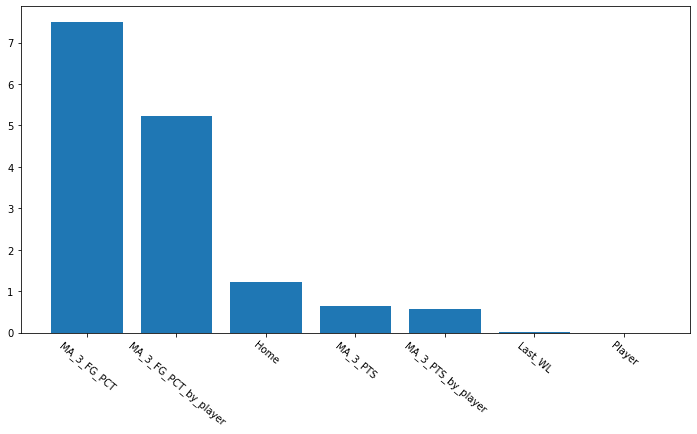

,coef
MA_3_FG_PCT,7.499444
MA_3_FG_PCT_by_player,5.231858
Home,1.222706
MA_3_PTS,0.637293
MA_3_PTS_by_player,0.579311
Last_WL,0.019342
Player,0.000120


In [36]:
import matplotlib.pyplot as plt  
# 使用DateFrame方式進行排序
new_coef_sort = new_coef.sort_values(by='coef', ascending=False)
# 畫圖 從高到低 去畫出 特徵重要性
plt.figure(figsize=(12, 6))
plt.bar(new_coef_sort.index , new_coef_sort['coef'])
plt.xticks(rotation=-40)
plt.savefig("45678")
plt.show()
new_coef_sort

# Cross Validation by TimeSeriesSplit

In [37]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html
model=lin_mod #reg
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

R2 = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
print(R2)
print(f"\nR2: {R2.mean()} (+/- {R2.std()}")



[       nan 0.60329208 0.6231113  0.60144165 0.59549756]

R2: nan (+/- nan


D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\ANACONDA\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ANACONDA\lib\site-packages\sklearn\linear_model\_base.py", line 547, in fit
    linalg.lstsq(X, y)
  File "D:\ANACONDA\lib\site-packages\scipy\linalg\basic.py", line 1223, in lstsq
    raise LinAlgError("SVD did not converge in Linear Least Squares")
numpy.linalg.LinAlgError: SVD did not converge in Linear Least Squares

  warnings.warn("Estimator fit failed. The score on this train-test"


In [38]:
mse = cross_val_score(model, X_train, y_train, cv=tscv, scoring='neg_mean_squared_error')
print(mse)
print(f"negative_MSE: {mse.mean()} (+/- {mse.std()}")

[-63.70616855 -64.20029138 -59.30613006 -59.85427942 -62.37142496]
negative_MSE: -61.887658876504965 (+/- 1.984348719577271


# Measures for Cross Evaluation

In [39]:
# Indexes for model
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = 1 -  (1 - r2) * (y_true.shape[0] - 1)/(y_true.shape[0] - n_parameters)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_hat = lin_mod.predict(X_valid) 
print_metrics(y_valid, y_hat, 10)   

Mean Square Error      = 53.077666296395876
Root Mean Square Error = 7.285442079681635
Mean Absolute Error    = 5.8781506723265595
Median Absolute Error  = 5.019527147125807
R^2                    = 0.6807197571911417
Adjusted R^2           = 0.6741890249518696


In [40]:
# 考慮最近的 500資料來預測 2019 季後賽的77場
# 建立模型必須要用 train data 來建立

In [41]:
from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X_train, y_train)
reg = LinearRegression().fit(X_train[:500], y_train[:500]) # code40 建立模型必須要用 train data 來建立
reg.coef_, reg.intercept_
predict = reg.predict(X)[:77]
answer = y[:77]
print(predict , answer)

[113.72159722 120.5095355  131.08532838 124.42232993 134.35062962
 115.28664888 120.0032183  118.39726964 108.27012155 111.3086166
 101.62590804 109.54678103 112.16008581 105.63576221 117.8879531
 120.00343751 114.46380367 112.83155562 113.60884581 129.91867375
 126.30940469 124.50931598 110.25734642 117.51671379 120.74429854
 119.00400634 123.79621778 115.00009488 118.47872995 112.14567372
 118.69272227 118.92226693 122.7909111  134.79046141 115.23666124
 114.59234686 119.9794071  119.54481181 126.29530605 100.3855332
 112.95293233 112.62764275 116.80296666 113.34198053 113.5727046
 116.53047248 126.71592405 116.98400608 116.37403665 114.42251757
 114.02651309 109.39412025 114.40276392 117.01658688 107.11112701
 114.67660339 114.34596099 111.30214193 110.30629582 105.00759994
  96.23333426 105.43951033 103.65902405 115.03992939 121.08223723
 133.67880806 119.91286732 121.09361035 112.29916128 118.60190136
 115.21386298 112.93957113 114.18490688 110.93304759 107.02405481
 112.3241172  

In [42]:
import numpy as np
a=np.transpose(np.vstack([answer, predict, (answer-predict)])).round()
a

array([[ 90., 114., -24.],
       [122., 121.,   1.],
       [122., 131.,  -9.],
       [122., 124.,  -2.],
       [149., 134.,  15.],
       [106., 115.,  -9.],
       [128., 120.,   8.],
       [112., 118.,  -6.],
       [112., 108.,   4.],
       [117., 111.,   6.],
       [ 84., 102., -18.],
       [114., 110.,   4.],
       [104., 112.,  -8.],
       [ 94., 106., -12.],
       [112., 118.,  -6.],
       [120., 120.,  -0.],
       [110., 114.,  -4.],
       [114., 113.,   1.],
       [118., 114.,   4.],
       [112., 130., -18.],
       [127., 126.,   1.],
       [141., 125.,  16.],
       [105., 110.,  -5.],
       [112., 118.,  -6.],
       [112., 121.,  -9.],
       [116., 119.,  -3.],
       [123., 124.,  -1.],
       [116., 115.,   1.],
       [119., 118.,   1.],
       [109., 112.,  -3.],
       [108., 119., -11.],
       [109., 119., -10.],
       [119., 123.,  -4.],
       [139., 135.,   4.],
       [119., 115.,   4.],
       [123., 115.,   8.],
       [103., 120., -17.],
 

In [43]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE test:', mean_squared_error(answer, predict))
print('R^2 test:',r2_score(answer, predict))

MSE test: 73.00714046869366
R^2 test: 0.48701557486094593


D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

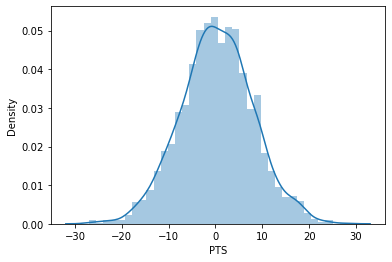

In [44]:
import seaborn as sns
sns.distplot((reg.predict(X) - y))
plt.show


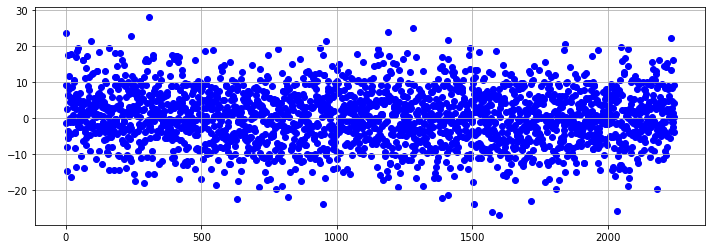

In [45]:
#residuals
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.grid()
plt.scatter(np.arange(len(X)), (reg.predict(X) - y), color='blue')
plt.show()

In [46]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_hat = reg.predict(X) 
print_metrics(y, y_hat, 1)       

Mean Square Error      = 60.34344634380783
Root Mean Square Error = 7.768104424105525
Mean Absolute Error    = 6.150940897920116
Median Absolute Error  = 5.060427950535448
R^2                    = 0.6128023537800391
Adjusted R^2           = 0.6128023537800391


# 接下來要處理test data 請自己寫寫看

In [47]:
#加 MA_5(前五場平均得分)  and 前一筆得分(or FGM/FG3M/FTM)"FGA", "FG3A", "FTM", "FTA", "REB", "STL","BLK","TOV","PF"
import numpy as np
p=3
test = test.sort_values(by=['GAME_DATE']) #依時間排序
test["MA_3_PTS"] = np.round(test["PTS"].rolling(window =p,center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_FG_PCT"] = np.round(test["FG_PCT"].rolling(window =p, center = 
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_FGM"] = np.round(test["FGM"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_3_FGA"] = np.round(test["FGA"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_3_FG3M"] = np.round(test["FG3M"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_3_FG3A"] = np.round(test["FG3A"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_3_FTM"] = np.round(test["FTM"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_3_AST"] = np.round(test["AST"].rolling(window =p, center = 
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_PLUS_MINUS"] = np.round(test["PLUS_MINUS"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_REB"] = np.round(test["REB"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_STL"] = np.round(test["STL"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_BLK"] = np.round(test["BLK"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_TOV"] = np.round(test["TOV"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_PF"] = np.round(test["PF"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己

test["Last_PTS"] = test.PTS.shift() #往前一筆
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_3_FG3A,MA_3_FTM,MA_3_AST,MA_3_PLUS_MINUS,MA_3_REB,MA_3_STL,MA_3_BLK,MA_3_TOV,MA_3_PF,Last_PTS
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,35.00,22.00,19.00,14.33,43.67,7.67,5.67,7.67,24.00,128.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,36.33,21.67,18.00,13.00,43.33,5.00,6.00,10.00,25.33,102.0
12,42019,1610612738,BOS,Boston Celtics,41900211,2020-08-30,BOS @ TOR,W,240,112,...,35.00,20.33,19.67,10.00,45.67,6.33,5.67,15.33,23.33,110.0
11,42019,1610612738,BOS,Boston Celtics,41900212,2020-09-01,BOS @ TOR,W,241,102,...,37.33,20.67,20.67,8.33,45.33,6.00,6.00,17.67,22.33,112.0
10,42019,1610612738,BOS,Boston Celtics,41900213,2020-09-03,BOS vs. TOR,L,239,103,...,35.33,18.67,21.33,6.67,46.00,6.67,6.67,17.67,19.33,102.0
9,42019,1610612738,BOS,Boston Celtics,41900214,2020-09-05,BOS vs. TOR,L,240,93,...,34.00,19.67,19.00,-1.67,44.33,6.00,6.00,15.00,18.67,103.0
8,42019,1610612738,BOS,Boston Celtics,41900215,2020-09-07,BOS @ TOR,W,238,111,...,32.67,20.00,20.67,4.67,44.67,5.67,5.00,13.00,18.33,93.0
7,42019,1610612738,BOS,Boston Celtics,41900216,2020-09-09,BOS vs. TOR,L,290,122,...,38.33,19.67,24.33,4.00,49.33,5.33,4.00,13.33,21.33,111.0


In [48]:
#依照對戰球隊和日期做排序(此加了 MA_5 and 前一筆得分(or FGM/FG3M/FTM))
import numpy as np

test = test.sort_values(by=['Player','GAME_DATE'])
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_3_FG3A,MA_3_FTM,MA_3_AST,MA_3_PLUS_MINUS,MA_3_REB,MA_3_STL,MA_3_BLK,MA_3_TOV,MA_3_PF,Last_PTS
5,42019,1610612738,BOS,Boston Celtics,41900301,2020-09-15,BOS vs. MIA,L,264,114,...,42.00,16.33,25.00,-0.40,46.33,8.67,5.00,11.67,22.00,92.0
4,42019,1610612738,BOS,Boston Celtics,41900302,2020-09-17,BOS vs. MIA,L,240,101,...,36.00,17.67,20.67,-1.07,40.67,8.67,4.67,13.33,21.00,114.0
3,42019,1610612738,BOS,Boston Celtics,41900303,2020-09-19,BOS @ MIA,W,240,117,...,32.00,22.00,23.33,0.07,42.67,7.33,4.00,14.67,25.33,101.0
2,42019,1610612738,BOS,Boston Celtics,41900304,2020-09-23,BOS @ MIA,L,239,109,...,31.33,20.67,24.67,1.20,45.67,5.33,3.67,17.67,25.00,117.0
1,42019,1610612738,BOS,Boston Celtics,41900305,2020-09-25,BOS vs. MIA,W,238,121,...,34.67,22.67,28.00,7.20,48.67,6.00,4.00,14.67,25.33,109.0
0,42019,1610612738,BOS,Boston Celtics,41900306,2020-09-27,BOS @ MIA,L,240,113,...,41.33,18.00,27.67,0.40,46.00,5.67,3.67,13.33,22.67,121.0
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,35.00,22.00,19.00,14.33,43.67,7.67,5.67,7.67,24.00,128.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,36.33,21.67,18.00,13.00,43.33,5.00,6.00,10.00,25.33,102.0


In [49]:
test.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'year', 'Home',
       'Player', 'MA_3_PTS', 'MA_3_FG_PCT', 'MA_3_FGM', 'MA_3_FGA',
       'MA_3_FG3M', 'MA_3_FG3A', 'MA_3_FTM', 'MA_3_AST', 'MA_3_PLUS_MINUS',
       'MA_3_REB', 'MA_3_STL', 'MA_3_BLK', 'MA_3_TOV', 'MA_3_PF', 'Last_PTS'],
      dtype='object')

In [50]:
#MA_5_by_player為對戰此對手前五場的平均分數  Last_PTS_player為對戰此對手的上場分數
#'MA_5_PTS', 'MA_5_FG_PCT', 'MA_5_FGM', 'MA_5_FGA','MA_5_FG3M', 'MA_5_FG3A', 'MA_5_FTM', 'MA_5_AST', 'MA_5_PLUS_MINUS',
#'MA_5_REB', 'MA_5_STL', 'MA_5_BLK', 'MA_5_TOV', 'MA_5_PF'
test["MA_3_PTS_by_player"] = np.round(test["PTS"].rolling(window =p, center =False  ).mean(),2) #往前五筆含自己
test["MA_3_FG_PCT_by_player"] = np.round(test["FG_PCT"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己
test["MA_3_FGM_by_player"] = np.round(test["FGM"].rolling(window =p, center = False  ).mean(),2)
test["MA_3_FGA_by_player"] = np.round(test["FGA"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_3_FG3M_by_player"] = np.round(test["FG3M"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_3_FG3A_by_player"] = np.round(test["FG3A"].rolling(window =p, center =
                       False  ).mean(),2)
test["MA_3_FTM_by_player"] = np.round(test["FTM"].rolling(window =p, center =
                       False  ).mean(),2)

test["MA_3_AST_by_player"] = np.round(test["AST"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己
test["MA_3_PLUS_MINUS_by_player"] = np.round(test["PLUS_MINUS"].rolling(window =p, center = False  ).mean(),2) #往前五筆含自己

test["MA_3_REB_by_player"] = np.round(test["REB"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_STL_by_player"] = np.round(test["STL"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_BLK_by_player"] = np.round(test["BLK"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_TOV_by_player"] = np.round(test["TOV"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己
test["MA_3_PF_by_player"] = np.round(test["PF"].rolling(window =p, center =
                       False  ).mean(),2) #往前五筆含自己

test["Last_PTS_player"] = test.PTS.shift() #往前一筆
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_3_FG3A_by_player,MA_3_FTM_by_player,MA_3_AST_by_player,MA_3_PLUS_MINUS_by_player,MA_3_REB_by_player,MA_3_STL_by_player,MA_3_BLK_by_player,MA_3_TOV_by_player,MA_3_PF_by_player,Last_PTS_player
5,42019,1610612738,BOS,Boston Celtics,41900301,2020-09-15,BOS vs. MIA,L,264,114,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42019,1610612738,BOS,Boston Celtics,41900302,2020-09-17,BOS vs. MIA,L,240,101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0
3,42019,1610612738,BOS,Boston Celtics,41900303,2020-09-19,BOS @ MIA,W,240,117,...,32.00,22.00,23.33,0.07,42.67,7.33,4.00,14.67,25.33,101.0
2,42019,1610612738,BOS,Boston Celtics,41900304,2020-09-23,BOS @ MIA,L,239,109,...,31.33,20.67,24.67,1.20,45.67,5.33,3.67,17.67,25.00,117.0
1,42019,1610612738,BOS,Boston Celtics,41900305,2020-09-25,BOS vs. MIA,W,238,121,...,34.67,22.67,28.00,7.20,48.67,6.00,4.00,14.67,25.33,109.0
0,42019,1610612738,BOS,Boston Celtics,41900306,2020-09-27,BOS @ MIA,L,240,113,...,41.33,18.00,27.67,0.40,46.00,5.67,3.67,13.33,22.67,121.0
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,38.33,20.00,25.67,3.00,45.00,8.67,3.33,9.33,21.67,113.0
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,40.00,18.67,22.67,7.67,42.67,7.67,3.67,7.67,23.33,109.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,35.00,22.00,19.00,14.33,43.67,7.67,5.67,7.67,24.00,128.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,36.33,21.67,18.00,13.00,43.33,5.00,6.00,10.00,25.33,102.0


In [51]:
#因為有四個變數有遺漏值，故需再補上
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='median')
# 依照策略strategy採用mean 或 median填補資料
test.iloc[:,31:63] = imr.fit_transform(test.iloc[:,31:63])
# 確認
test[-20:]


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_3_FG3A_by_player,MA_3_FTM_by_player,MA_3_AST_by_player,MA_3_PLUS_MINUS_by_player,MA_3_REB_by_player,MA_3_STL_by_player,MA_3_BLK_by_player,MA_3_TOV_by_player,MA_3_PF_by_player,Last_PTS_player
5,42019,1610612738,BOS,Boston Celtics,41900301,2020-09-15,BOS vs. MIA,L,264,114,...,35.33,20.00,22.67,6.67,45.33,6.00,5.00,13.33,22.67,110.5
4,42019,1610612738,BOS,Boston Celtics,41900302,2020-09-17,BOS vs. MIA,L,240,101,...,35.33,20.00,22.67,6.67,45.33,6.00,5.00,13.33,22.67,114.0
3,42019,1610612738,BOS,Boston Celtics,41900303,2020-09-19,BOS @ MIA,W,240,117,...,32.00,22.00,23.33,0.07,42.67,7.33,4.00,14.67,25.33,101.0
2,42019,1610612738,BOS,Boston Celtics,41900304,2020-09-23,BOS @ MIA,L,239,109,...,31.33,20.67,24.67,1.20,45.67,5.33,3.67,17.67,25.00,117.0
1,42019,1610612738,BOS,Boston Celtics,41900305,2020-09-25,BOS vs. MIA,W,238,121,...,34.67,22.67,28.00,7.20,48.67,6.00,4.00,14.67,25.33,109.0
0,42019,1610612738,BOS,Boston Celtics,41900306,2020-09-27,BOS @ MIA,L,240,113,...,41.33,18.00,27.67,0.40,46.00,5.67,3.67,13.33,22.67,121.0
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,38.33,20.00,25.67,3.00,45.00,8.67,3.33,9.33,21.67,113.0
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,40.00,18.67,22.67,7.67,42.67,7.67,3.67,7.67,23.33,109.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,35.00,22.00,19.00,14.33,43.67,7.67,5.67,7.67,24.00,128.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,36.33,21.67,18.00,13.00,43.33,5.00,6.00,10.00,25.33,102.0


In [52]:
#檢查遺失值
test.isnull().sum(),test.shape

(SEASON_ID             0
 TEAM_ID               0
 TEAM_ABBREVIATION     0
 TEAM_NAME             0
 GAME_ID               0
                      ..
 MA_3_STL_by_player    0
 MA_3_BLK_by_player    0
 MA_3_TOV_by_player    0
 MA_3_PF_by_player     0
 Last_PTS_player       0
 Length: 61, dtype: int64,
 (17, 61))

In [53]:
#主客場欄位改成0,1
test['Home'] = test['Home'].astype(int)
test['Home']

5     1
4     1
3     0
2     0
1     1
0     0
16    1
15    1
14    0
13    0
12    0
11    0
10    1
9     1
8     0
7     1
6     0
Name: Home, dtype: int32

In [54]:
#4.將"WL"做編碼
size_mapping = {'W': 1,'L': 0}

test['Last_WL'] = test['WL'].shift().map(size_mapping) # code26修改為前一場的輸贏
test
imr = SimpleImputer(missing_values=np.nan, strategy='median')
# 依照策略strategy採用mean 或 median填補資料
test.iloc[:,-1:] = imr.fit_transform(test.iloc[:,-1:])

In [55]:
Player_mapping ={'WAS':1, 'MEM':2, 'ORL':3, 'TOR':4, 'BKN':5, 'MIA':6, 'POR':7, 'MIL':8, 'HOU':9,
       'PHX':10, 'OKC':11, 'IND':12, 'UTA':13, 'CLE':14, 'LAL':15, 'MIN':16, 'LAC':17, 'ATL':18,
       'PHI':19, 'GSW':20, 'NOP':21, 'DET':22, 'CHI':23, 'SAS':24, 'CHA':25, 'DAL':26, 'DEN':27,
       'NYK':28, 'SAC':29, 'RMD':30, 'MLN':31, 'NOH':32, 'EAM':33, 'FBU':34, 'NJN':35, 'SEA':36,
       'NOK':37, 'CHH':38, 'VAN':39}
# 將'Player" 轉換成有序編碼
test ['Player'] = test ['Player'].map(Player_mapping)
test

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,MA_3_FTM_by_player,MA_3_AST_by_player,MA_3_PLUS_MINUS_by_player,MA_3_REB_by_player,MA_3_STL_by_player,MA_3_BLK_by_player,MA_3_TOV_by_player,MA_3_PF_by_player,Last_PTS_player,Last_WL
5,42019,1610612738,BOS,Boston Celtics,41900301,2020-09-15,BOS vs. MIA,L,264,114,...,20.00,22.67,6.67,45.33,6.00,5.00,13.33,22.67,110.5,1.0
4,42019,1610612738,BOS,Boston Celtics,41900302,2020-09-17,BOS vs. MIA,L,240,101,...,20.00,22.67,6.67,45.33,6.00,5.00,13.33,22.67,114.0,0.0
3,42019,1610612738,BOS,Boston Celtics,41900303,2020-09-19,BOS @ MIA,W,240,117,...,22.00,23.33,0.07,42.67,7.33,4.00,14.67,25.33,101.0,0.0
2,42019,1610612738,BOS,Boston Celtics,41900304,2020-09-23,BOS @ MIA,L,239,109,...,20.67,24.67,1.20,45.67,5.33,3.67,17.67,25.00,117.0,1.0
1,42019,1610612738,BOS,Boston Celtics,41900305,2020-09-25,BOS vs. MIA,W,238,121,...,22.67,28.00,7.20,48.67,6.00,4.00,14.67,25.33,109.0,0.0
0,42019,1610612738,BOS,Boston Celtics,41900306,2020-09-27,BOS @ MIA,L,240,113,...,18.00,27.67,0.40,46.00,5.67,3.67,13.33,22.67,121.0,1.0
16,42019,1610612738,BOS,Boston Celtics,41900121,2020-08-17,BOS vs. PHI,W,239,109,...,20.00,25.67,3.00,45.00,8.67,3.33,9.33,21.67,113.0,0.0
15,42019,1610612738,BOS,Boston Celtics,41900122,2020-08-19,BOS vs. PHI,W,241,128,...,18.67,22.67,7.67,42.67,7.67,3.67,7.67,23.33,109.0,1.0
14,42019,1610612738,BOS,Boston Celtics,41900123,2020-08-21,BOS @ PHI,W,240,102,...,22.00,19.00,14.33,43.67,7.67,5.67,7.67,24.00,128.0,1.0
13,42019,1610612738,BOS,Boston Celtics,41900124,2020-08-23,BOS @ PHI,W,240,110,...,21.67,18.00,13.00,43.33,5.00,6.00,10.00,25.33,102.0,1.0


In [56]:
parts = test[["PTS",'GAME_ID',"Player" ,"Home","Last_WL", "MA_3_FG_PCT","MA_3_FG_PCT_by_player",
               "MA_3_PTS", "MA_3_PTS_by_player" ]]
# 與 Dummy New_columns合併
test_new = pd.concat([parts], axis=1)# 左右合併
test_new.shape

(17, 9)

In [57]:
y_test= test_new.iloc[:,0 ]
X_test = test_new.iloc[:,2: ]


In [59]:
from sklearn.linear_model import LinearRegression
# reg = LinearRegression().fit(X_train, y_train)
reg = LinearRegression().fit(X_train[:], y_train[:]) # code40 建立模型必須要用 train data 來建立
reg.coef_, reg.intercept_
predict = reg.predict(X_test)[:17]
answer =y_test[:17]
print(predict , answer)

[111.91289457 107.58248883 113.02419665 111.13912288 120.20261002
 117.11437062 114.65989548 116.13946213 115.49784641 116.02663878
 109.4130268  109.4130268  107.80104517  99.94112012 102.75016558
 111.57817048 109.79516411] 5     114
4     101
3     117
2     109
1     121
0     113
16    109
15    128
14    102
13    110
12    112
11    102
10    103
9      93
8     111
7     122
6      92
Name: PTS, dtype: int64


In [60]:
import numpy as np
error= answer-predict
a=np.transpose(np.vstack([answer, predict, error])).round()
a

array([[114., 112.,   2.],
       [101., 108.,  -7.],
       [117., 113.,   4.],
       [109., 111.,  -2.],
       [121., 120.,   1.],
       [113., 117.,  -4.],
       [109., 115.,  -6.],
       [128., 116.,  12.],
       [102., 115., -13.],
       [110., 116.,  -6.],
       [112., 109.,   3.],
       [102., 109.,  -7.],
       [103., 108.,  -5.],
       [ 93., 100.,  -7.],
       [111., 103.,   8.],
       [122., 112.,  10.],
       [ 92., 110., -18.]])

In [61]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print('MSE test:', mean_squared_error(answer, predict))
print('R^2 test:',r2_score(answer, predict))

MSE test: 64.88633270823439
R^2 test: 0.28086554100783323


D:\ANACONDA\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

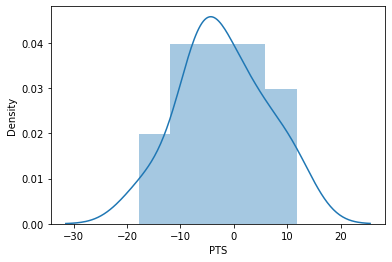

In [62]:
import seaborn as sns
sns.distplot((answer-predict))
plt.show

In [63]:
print(len(X_test))
print(len(answer-predict))

17
17


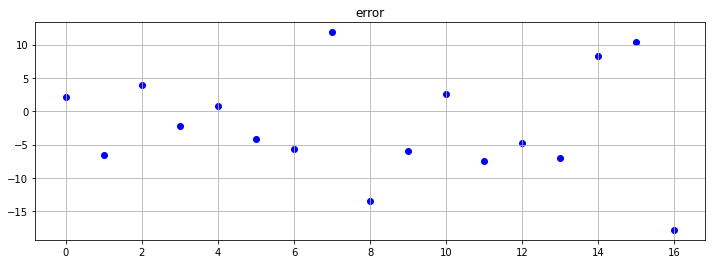

In [64]:
#residuals
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.grid()
plt.scatter(np.arange(len(X_test)), (answer-predict), color='blue')
plt.savefig("999999")
plt.title("error")
plt.show()

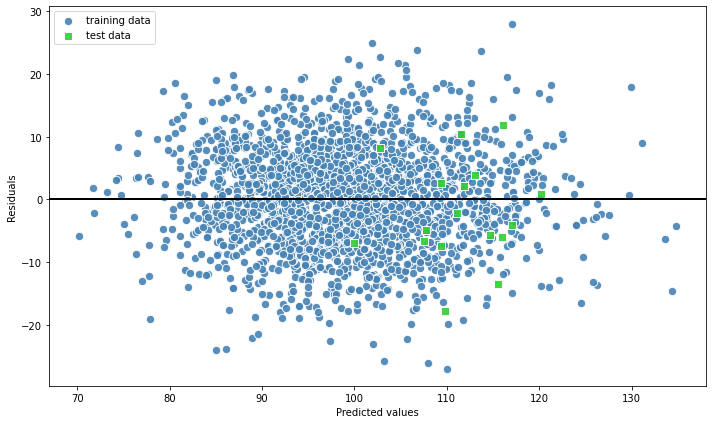

In [65]:
plt.figure(figsize=(10, 6))

plt.scatter(y_hat,   y_hat - y, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=70,
            alpha=0.9,
            label='training data')


plt.scatter(predict,  
            answer-predict, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=70,
            alpha=0.9,
            label='test data')



plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, lw=2, color='black')
plt.tight_layout()

plt.savefig('images10145', dpi=300)
plt.show()

In [66]:
residual = y_hat - y
residual.mean(), residual.std()
std_res = (residual-residual.mean())/residual.std()
print(std_res)

17      3.014866
18     -0.232686
19      1.129576
20      0.271319
21     -1.927678
          ...   
2285    0.155610
2286    0.487207
2287    1.127880
2288   -0.013180
2289   -0.558348
Name: PTS, Length: 2246, dtype: float64


In [67]:
new_res =  answer-predict
new_std_res = (new_res - residual.mean())/residual.std()

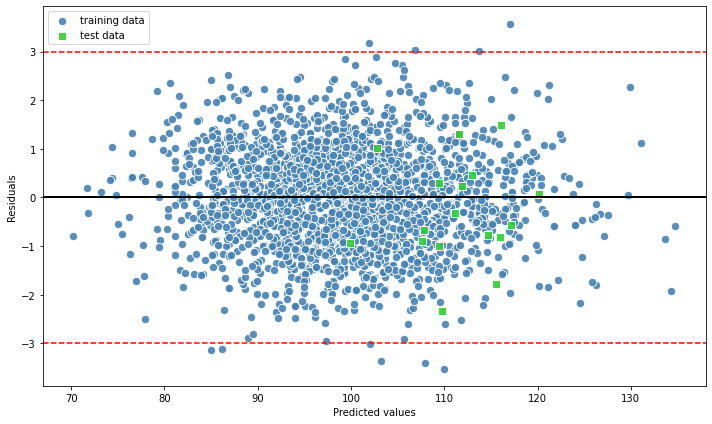

In [68]:
plt.figure(figsize=(10, 6))

plt.scatter(y_hat,    std_res, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=70,
            alpha=0.9,
            label='training data')


plt.scatter(predict,  
            new_std_res, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=70,
            alpha=0.9,
            label='test data')

plt.axhline(0, color="red")
plt.axhline(3, color="red", linestyle="dashed")
plt.axhline(-3, color="red", linestyle="dashed")
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, lw=2, color='black')
plt.tight_layout()

plt.savefig('images10_14', dpi=300)
plt.show()